In [59]:
import os
import sys  

import rasterio

from rasterio.plot import show

import numpy as np

#from PIL import Image

import numpy as np

import matplotlib.pyplot as plt

from geneticalgorithm import geneticalgorithm as ga


root = os.getcwd() + "/.."

sys.path.insert(0, root)
import src.camera_allocation_functions as aptitude



In [60]:

fp1 = '../data/processed/aguascalientes/00_clossenes_to_streets_normalized_ags'
walls = rasterio.open(fp1)

fp2 = '../data/processed/aguascalientes/01_densidad_delitos_sobre_calle_1998'
crime_density = rasterio.open(fp2)

fp3 = '../data/processed/aguascalientes/02_manzanas_raster_binary'
blocks = rasterio.open(fp3)

#correction
S = blocks.read(1)
S[S==255] = 0

CD = crime_density.read(1)

W = walls.read(1)

Text(0.5, 0.98, 'Required Maps')

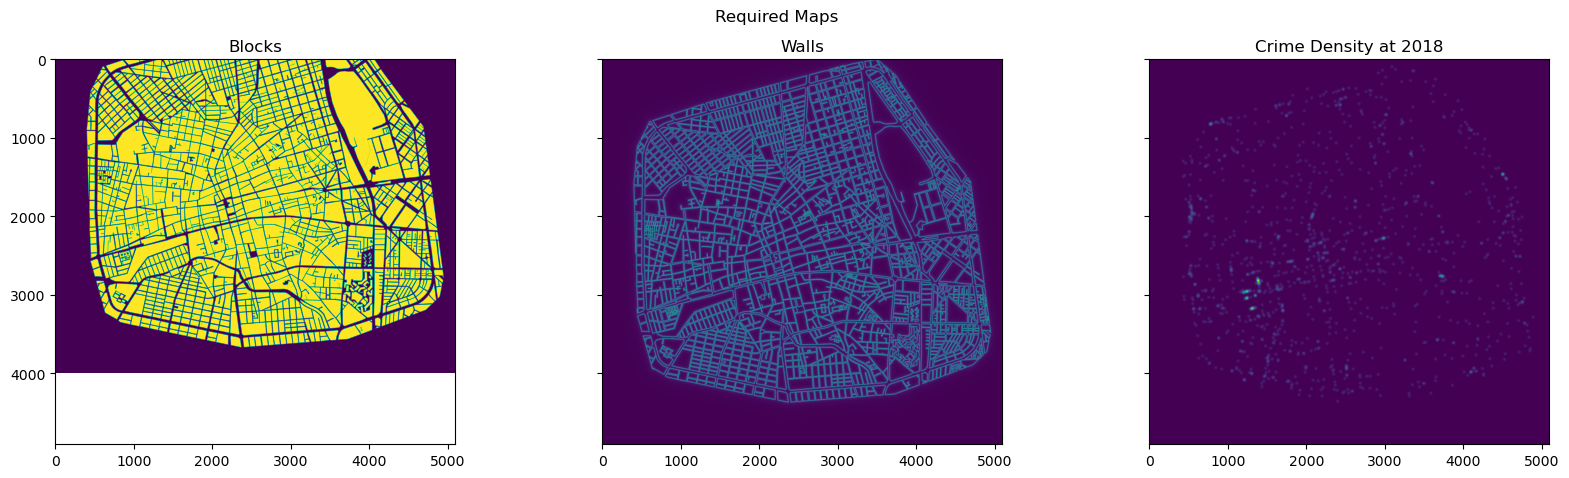

In [186]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
axs[0].imshow(S[600:4900][100:4100])
axs[0].set_title("Blocks")
axs[1].imshow(W)
axs[1].set_title("Walls")
axs[2].imshow(CD)
axs[2].set_title("Crime Density at 2018")
fig.suptitle('Required Maps')


In [170]:
np.sum(S==0)/(np.sum(S==1)+np.sum(S!=1))

0.5146466147595599

In [62]:
# we set the parameter of the cover region of the surveillance camera (SC) that is (L*2+1)^2
L = 50

#we test the point 
si = (3420, 2690)

Text(0.5, 1.0, 'Isovist')

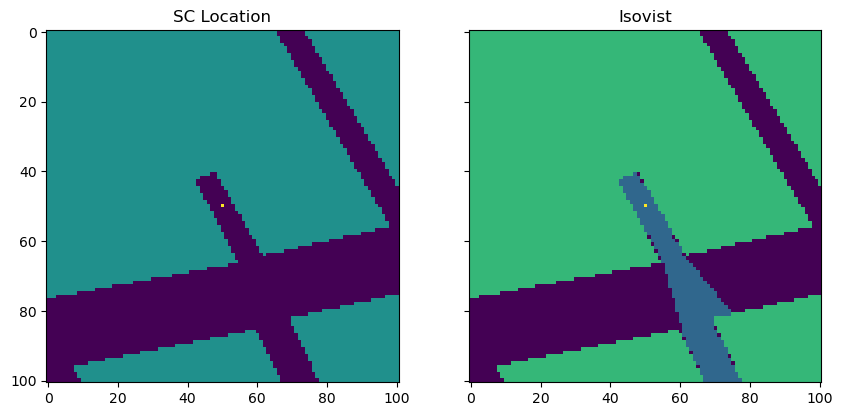

In [63]:
Sc = np.copy(S)
Sc[si] =  S[si]

RSC = np.copy(Sc[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
RSCc = np.copy(RSC)

Z = np.zeros(np.shape(RSC))
Z[(L, L)] = 2

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

axs[0].imshow(RSC+Z)
axs[0].set_title("SC Location")
axs[1].imshow(aptitude.isovista(RSCc)+RSCc*2+Z)
axs[1].set_title("Isovist")

In [64]:
def F(X, S=S, Walls=W, CD=CD):
    
    return aptitude.F(X, S, Walls, CD)

In [65]:
#testing F

# num of cameras

n_cameras = 10

varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_cameras)

X = np.array([np.random.randint(p[0], p[1]) for p in varbound])

In [66]:
X_resh = X.reshape(-1, 2)

checar coordenada: (447, 249)

(1082, 2335)


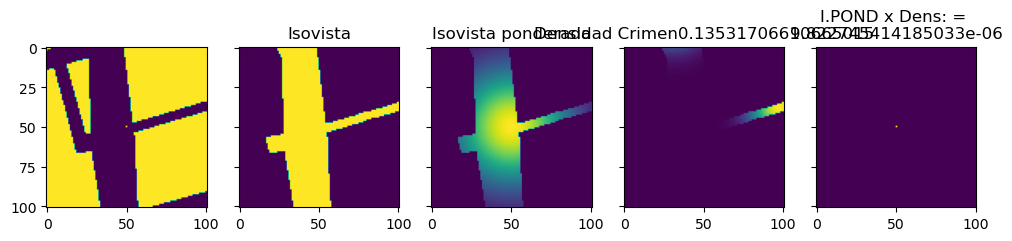

(3259, 698)


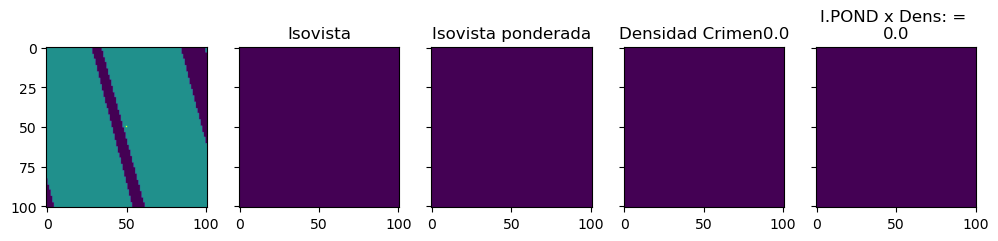

(247, 3634)


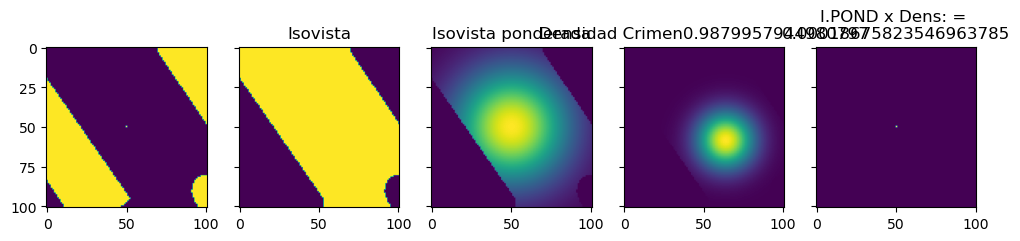

(1598, 4777)


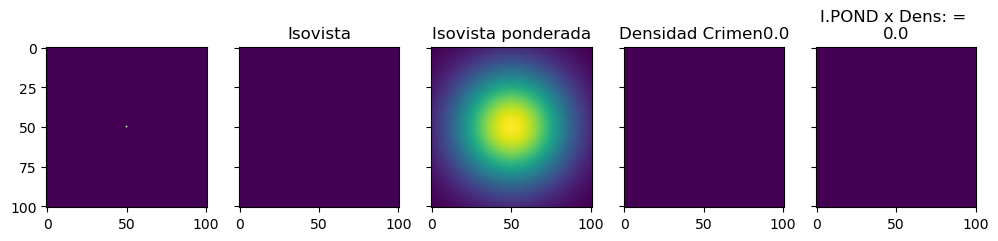

(3992, 4752)


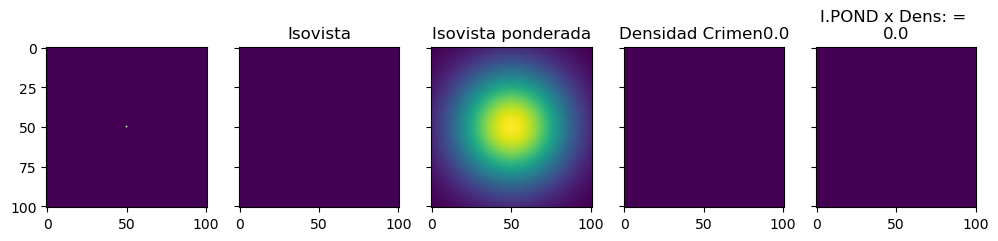

(4674, 1862)


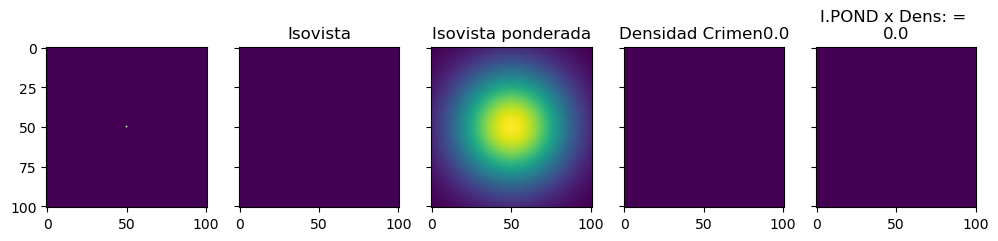

(837, 3469)


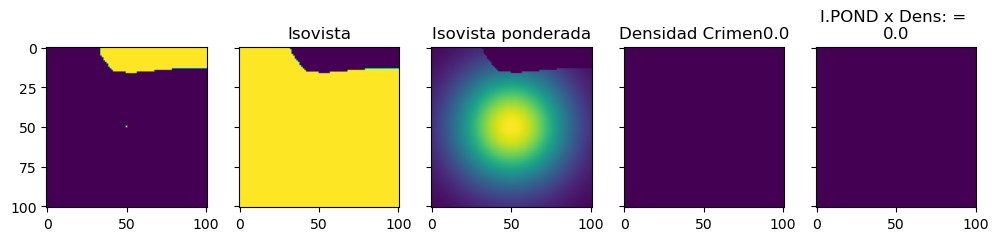

(2861, 1348)


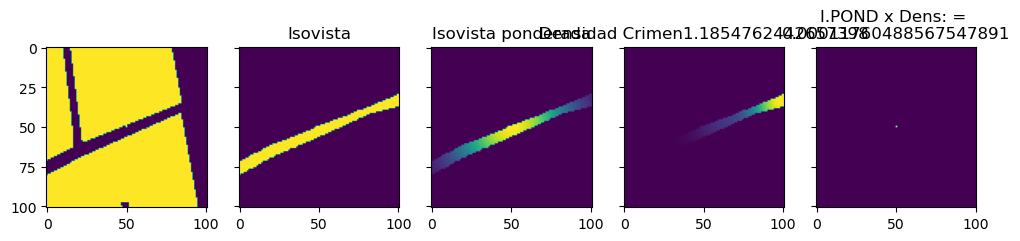

(761, 2320)


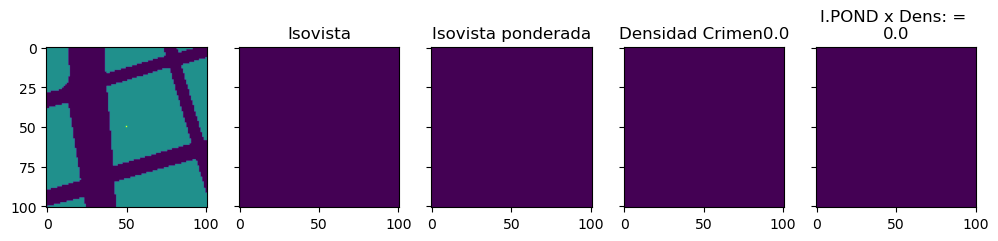

(785, 377)


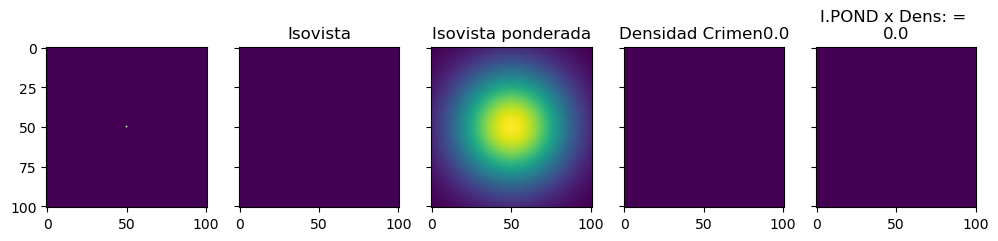

In [67]:
COVERS = np.zeros((n_cameras+1, S.shape[0], S.shape[1]))

for i, x in enumerate(X_resh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((101, 101))
    Z[(L, L)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(L*2 + 1, 2)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    axs[1].imshow(mask)
    axs[1].title.set_text("Isovista")
    axs[2].imshow(mask*K)
    axs[2].title.set_text("Isovista ponderada")
    axs[3].imshow(CD_sub*mask)
    axs[3].title.set_text("Densidad Crimen" + str(np.sum(CD_sub*mask)))
    axs[4].imshow(CD_sub*K*mask+Z*np.max(CD_sub*mask))
    axs[4].title.set_text("I.POND x Dens: = \n"+str(np.sum(CD_sub*K*mask)))
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   

    
    
    

In [151]:
np.mean(T)*S.shape[0]*S.shape[1]/60/60

23.205142120352388

In [106]:
m = 0

c = 0
for i in range(L, (S.shape[1])):
    for j in range(L, (S.shape[0])):
        

        
        si = (i, j)
        S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
        CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
        mask = aptitude.isovista(S_sub)
        K = aptitude.gkern(L*2 + 1, 2)
        
        
        p = np.sum(CD_sub*K*mask)
        if m > p:
            m = p
            x_max = j
            y_max = i
            
        if (c%1000)==0:
            print("pix:", c)
        c+=1
        
  
   
            
            
        

pix: 0
pix: 1000
pix: 2000
pix: 3000
pix: 4000
pix: 5000


KeyboardInterrupt: 

Text(0.5, 1.0, '2.4525938932019204e-05')

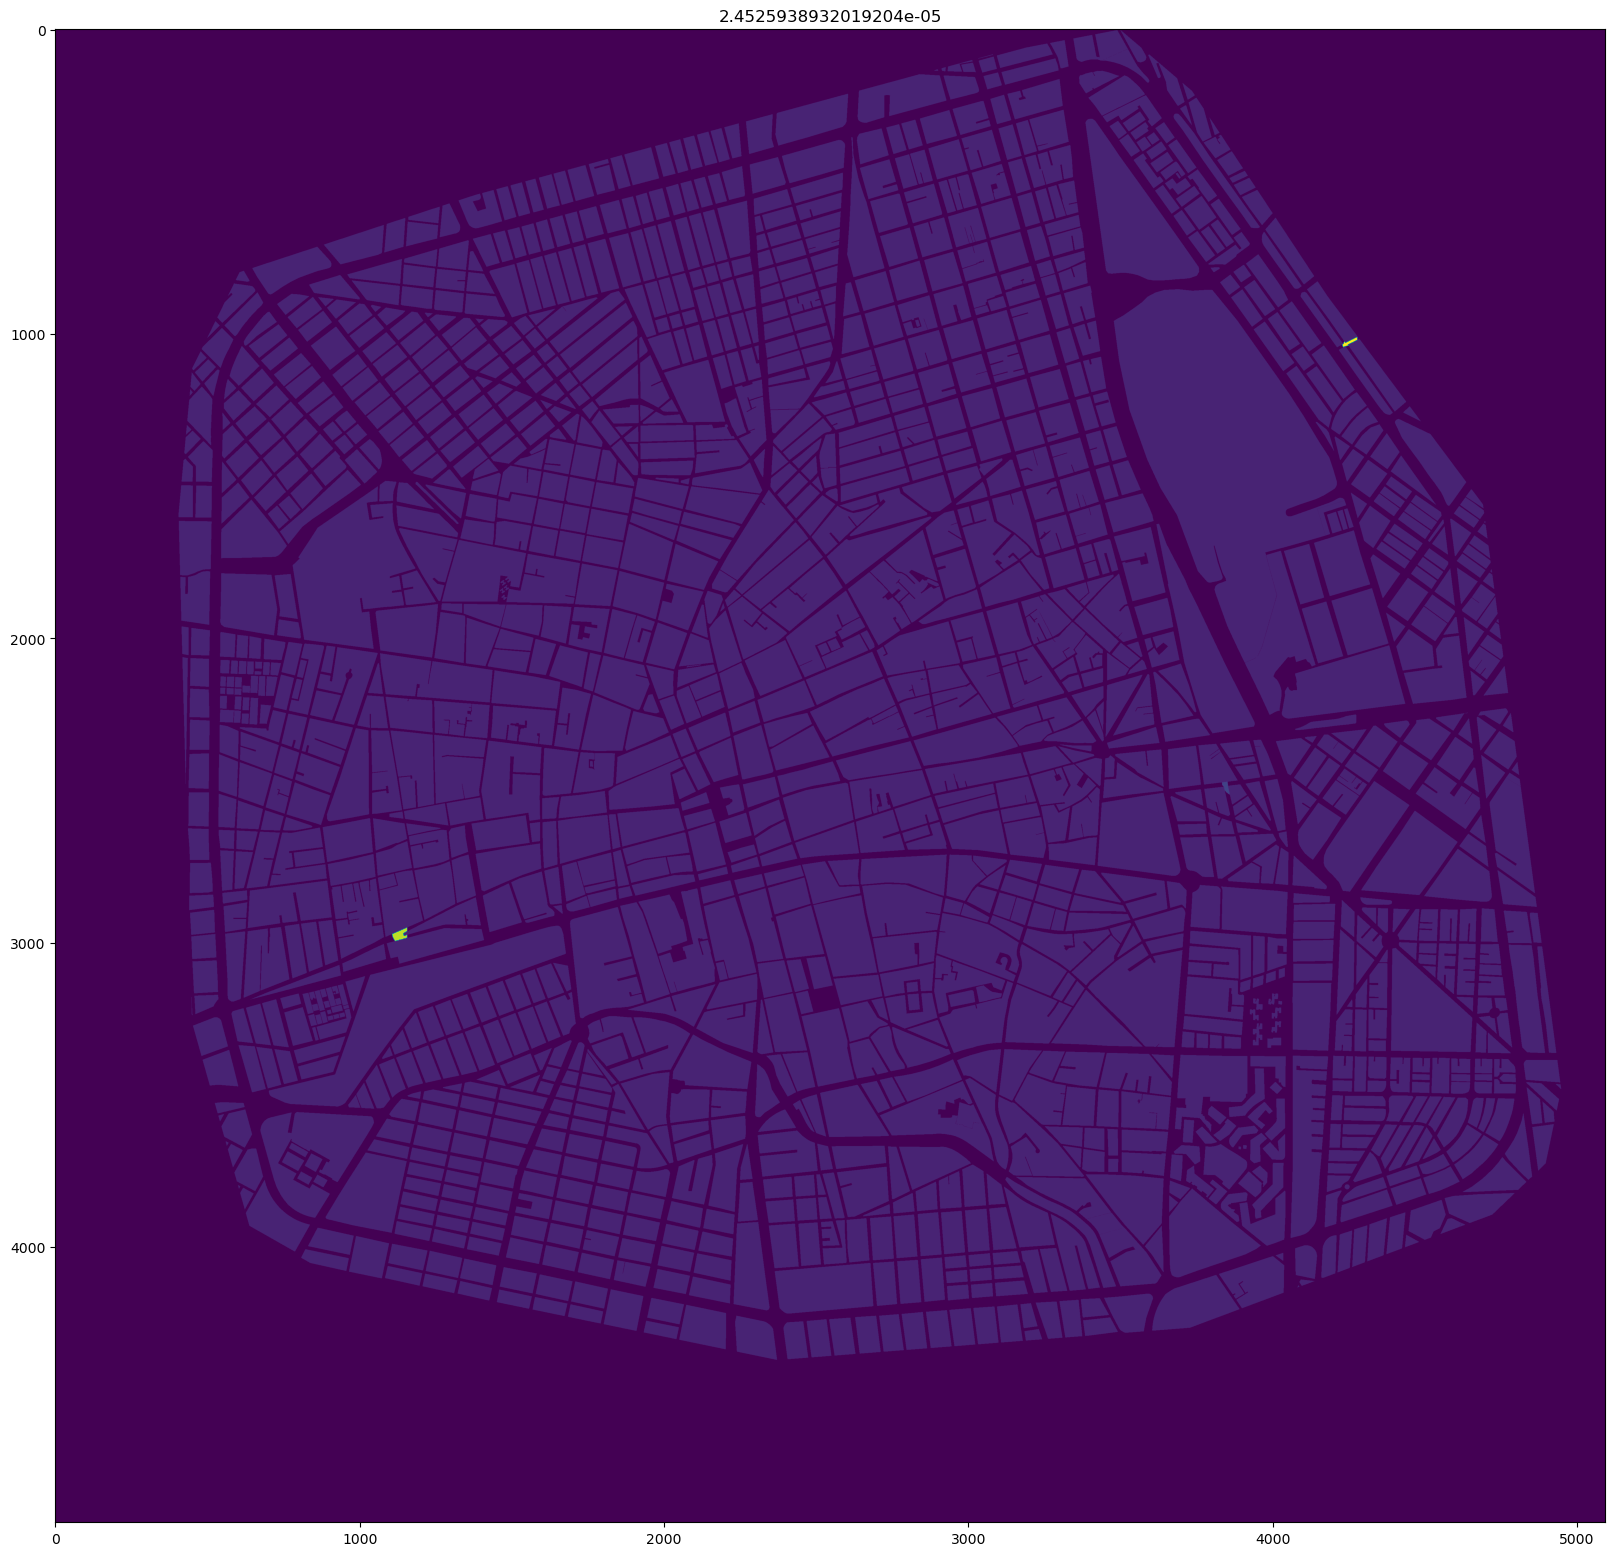

In [21]:
plt.figure(figsize=(20, 20))
arg_max_covers = np.argmax(COVERS, axis=0)
max_covers = np.max(COVERS, axis=0)
plt.imshow(arg_max_covers+S*1)
plt.title(np.sum(max_covers))

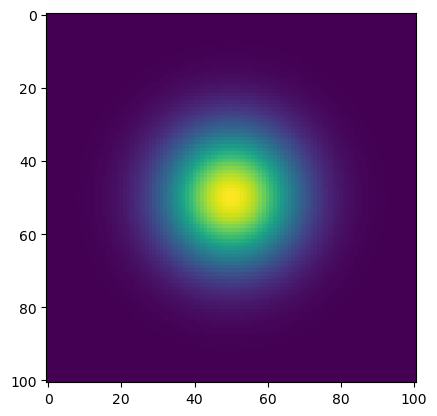

In [68]:
plt.imshow(aptitude.gkern(L*2+1, 4))

In [69]:
n_sensors = 10
varbound = np.array([[L, S.shape[0]-L-1], [L, S.shape[1]-L-1]]*n_sensors)
dim = len(varbound)

In [152]:
algorithm_parameters = {"max_num_iteration": 20, 
                        "population_size": 30, 
                        "mutation_probability": 0.01, 
                        "elit_ratio": 0.1, 
                        "crossover_probability": 0.5, 
                        "parents_portion": 0.3, 
                        "crossover_type": 
                        "uniform", 
                        "max_iteration_without_improv": 20}

In [153]:
model = ga(function = F,
             dimension = dim,
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = varbound,
             convergence_curve = True)

 The best solution found:                                                                           
 [2726. 2511. 2246. 3145. 4043. 1465. 3978. 4116. 2063. 2534. 2836. 4151.
 1147. 1277. 3977. 1128. 2269. 3725. 3360. 4575.]

 Objective function:
 -0.0031769331911211413


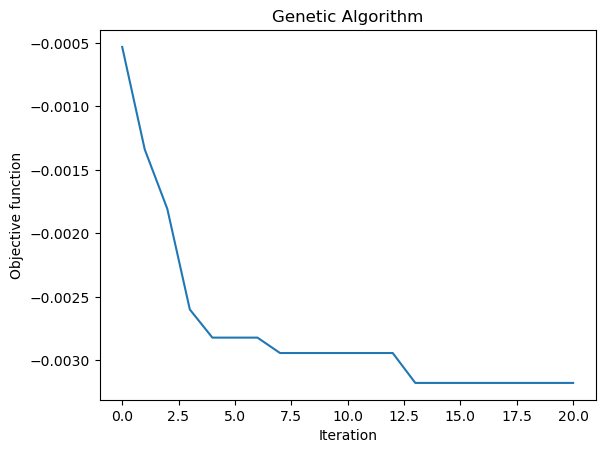

In [154]:
model.run()

In [155]:
Xresh = model.output_dict["variable"].astype(int).reshape(-1,2)

(2726, 2511)


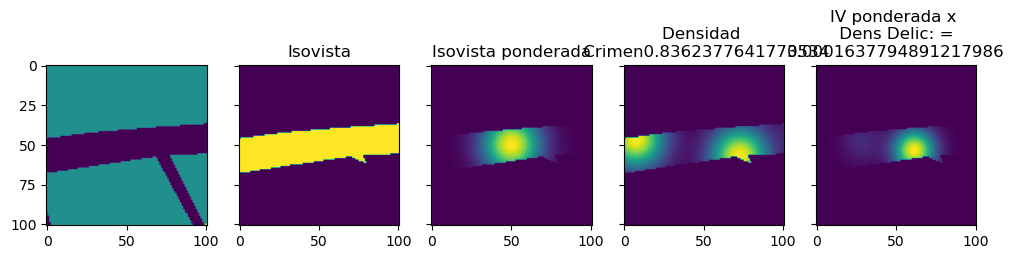

(2246, 3145)


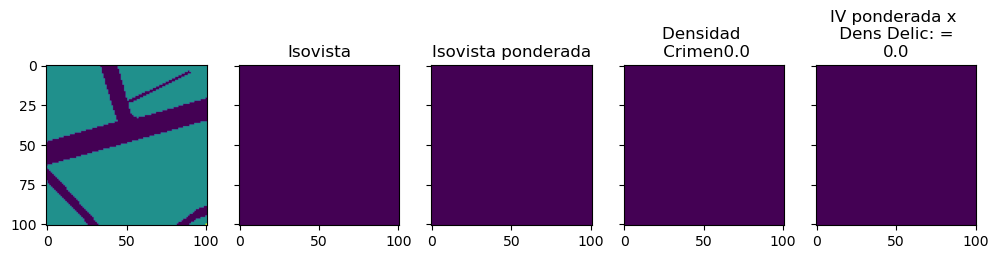

(4043, 1465)


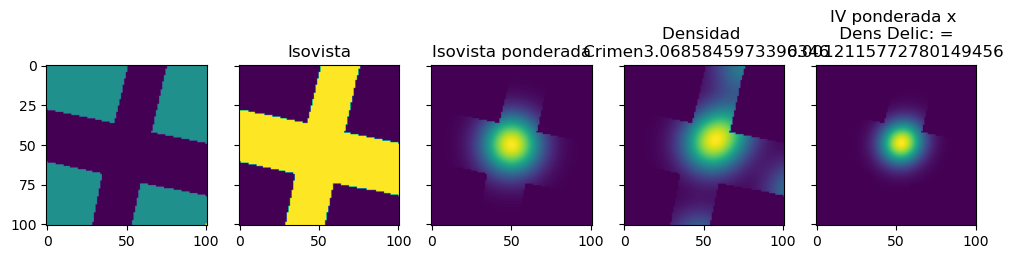

(3978, 4116)


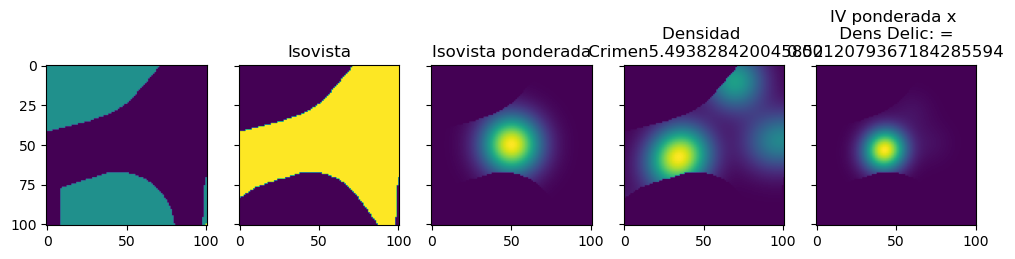

(2063, 2534)


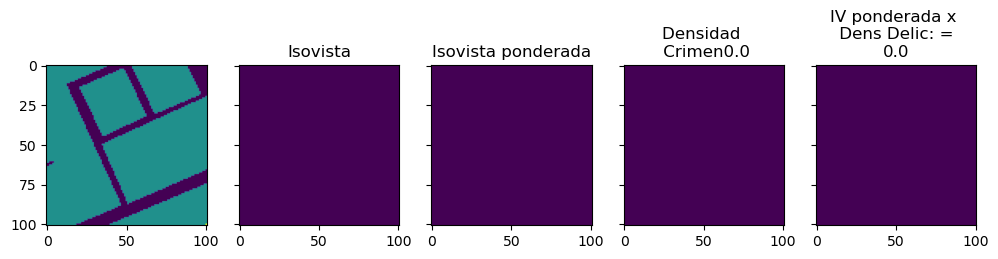

(2836, 4151)


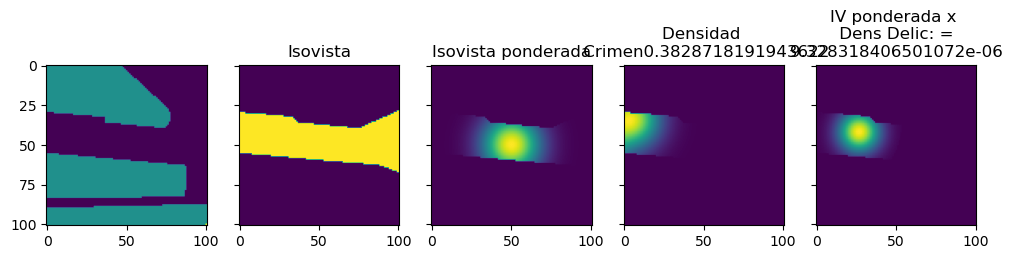

(1147, 1277)


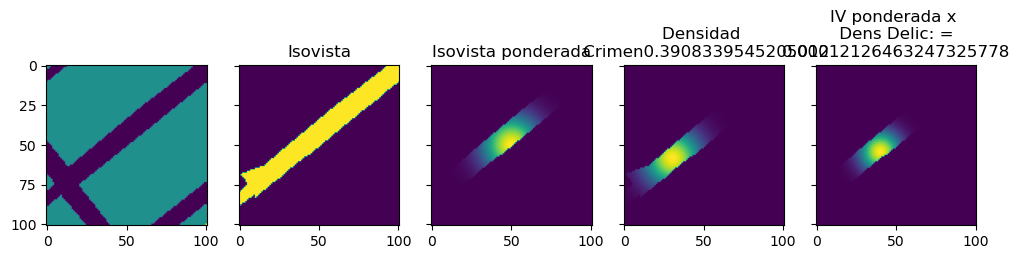

(3977, 1128)


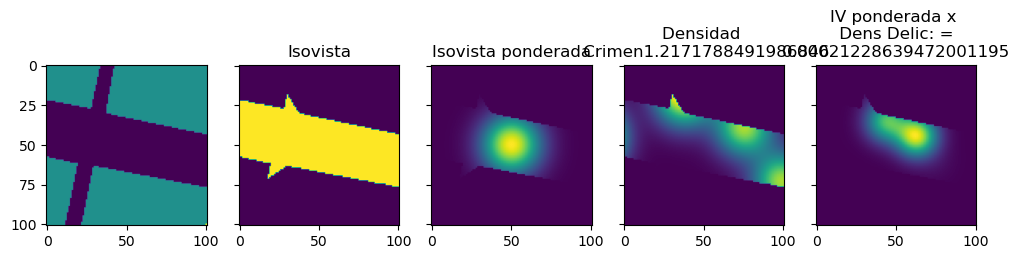

(2269, 3725)


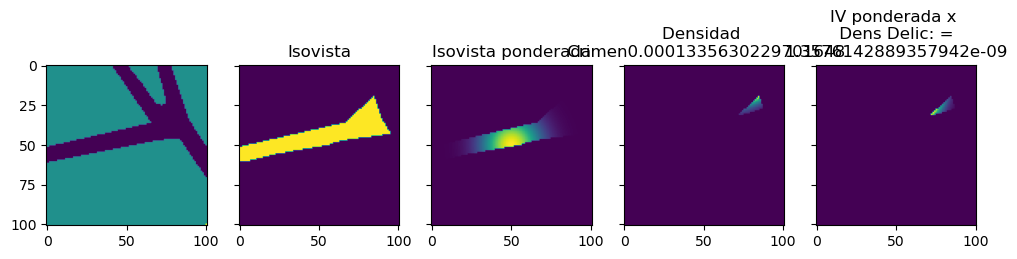

(3360, 4575)


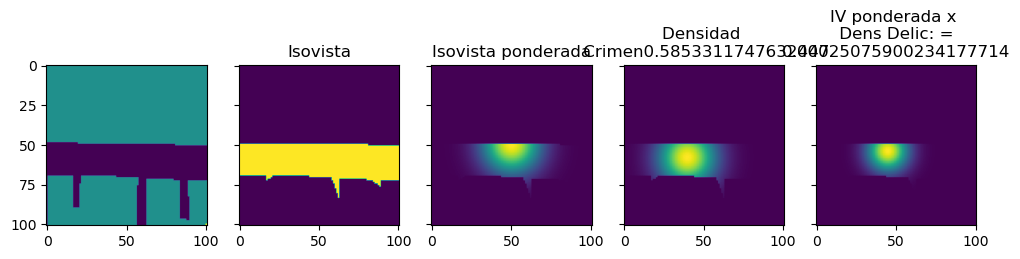

In [159]:
COVERS = np.zeros((n_sensors+1, S.shape[0], S.shape[1]))

for i, x in enumerate(Xresh):
    
    si = tuple(x)
    print(si)
    
    Z = np.zeros((L*2+1, L*2+1))
    Z[(L*2, L*2)] = 1
    
    S_sub = np.copy(S[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    CD_sub = np.copy(CD[si[0]-L:si[0]+L+1, si[1]-L:si[1]+L+1])
    
    
    mask = aptitude.isovista(S_sub)
    K = aptitude.gkern(101, 4)
    
    fig, axs = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
    axs[0].imshow(S_sub+Z)
    
    axs[1].title.set_text("Isovista")
    axs[1].imshow(mask)
    
    axs[2].title.set_text("Isovista ponderada")
    axs[2].imshow(mask*K)
    
    axs[3].title.set_text("Densidad \n Crimen" + str(np.sum(CD_sub*mask)))
    axs[3].imshow(CD_sub*mask)
    
    axs[4].imshow(CD_sub*K*mask)
    axs[4].title.set_text("IV ponderada x \n Dens Delic: = \n"+str(np.sum(CD_sub*K*mask)).format)
    
    COVERS[i+1, si[0]-L : si[0] + L + 1, si[1]-L:si[1]+L+1] = CD_sub*K*mask

    plt.show()
    
max_covers = np.max(COVERS, axis=0)
    
   
   


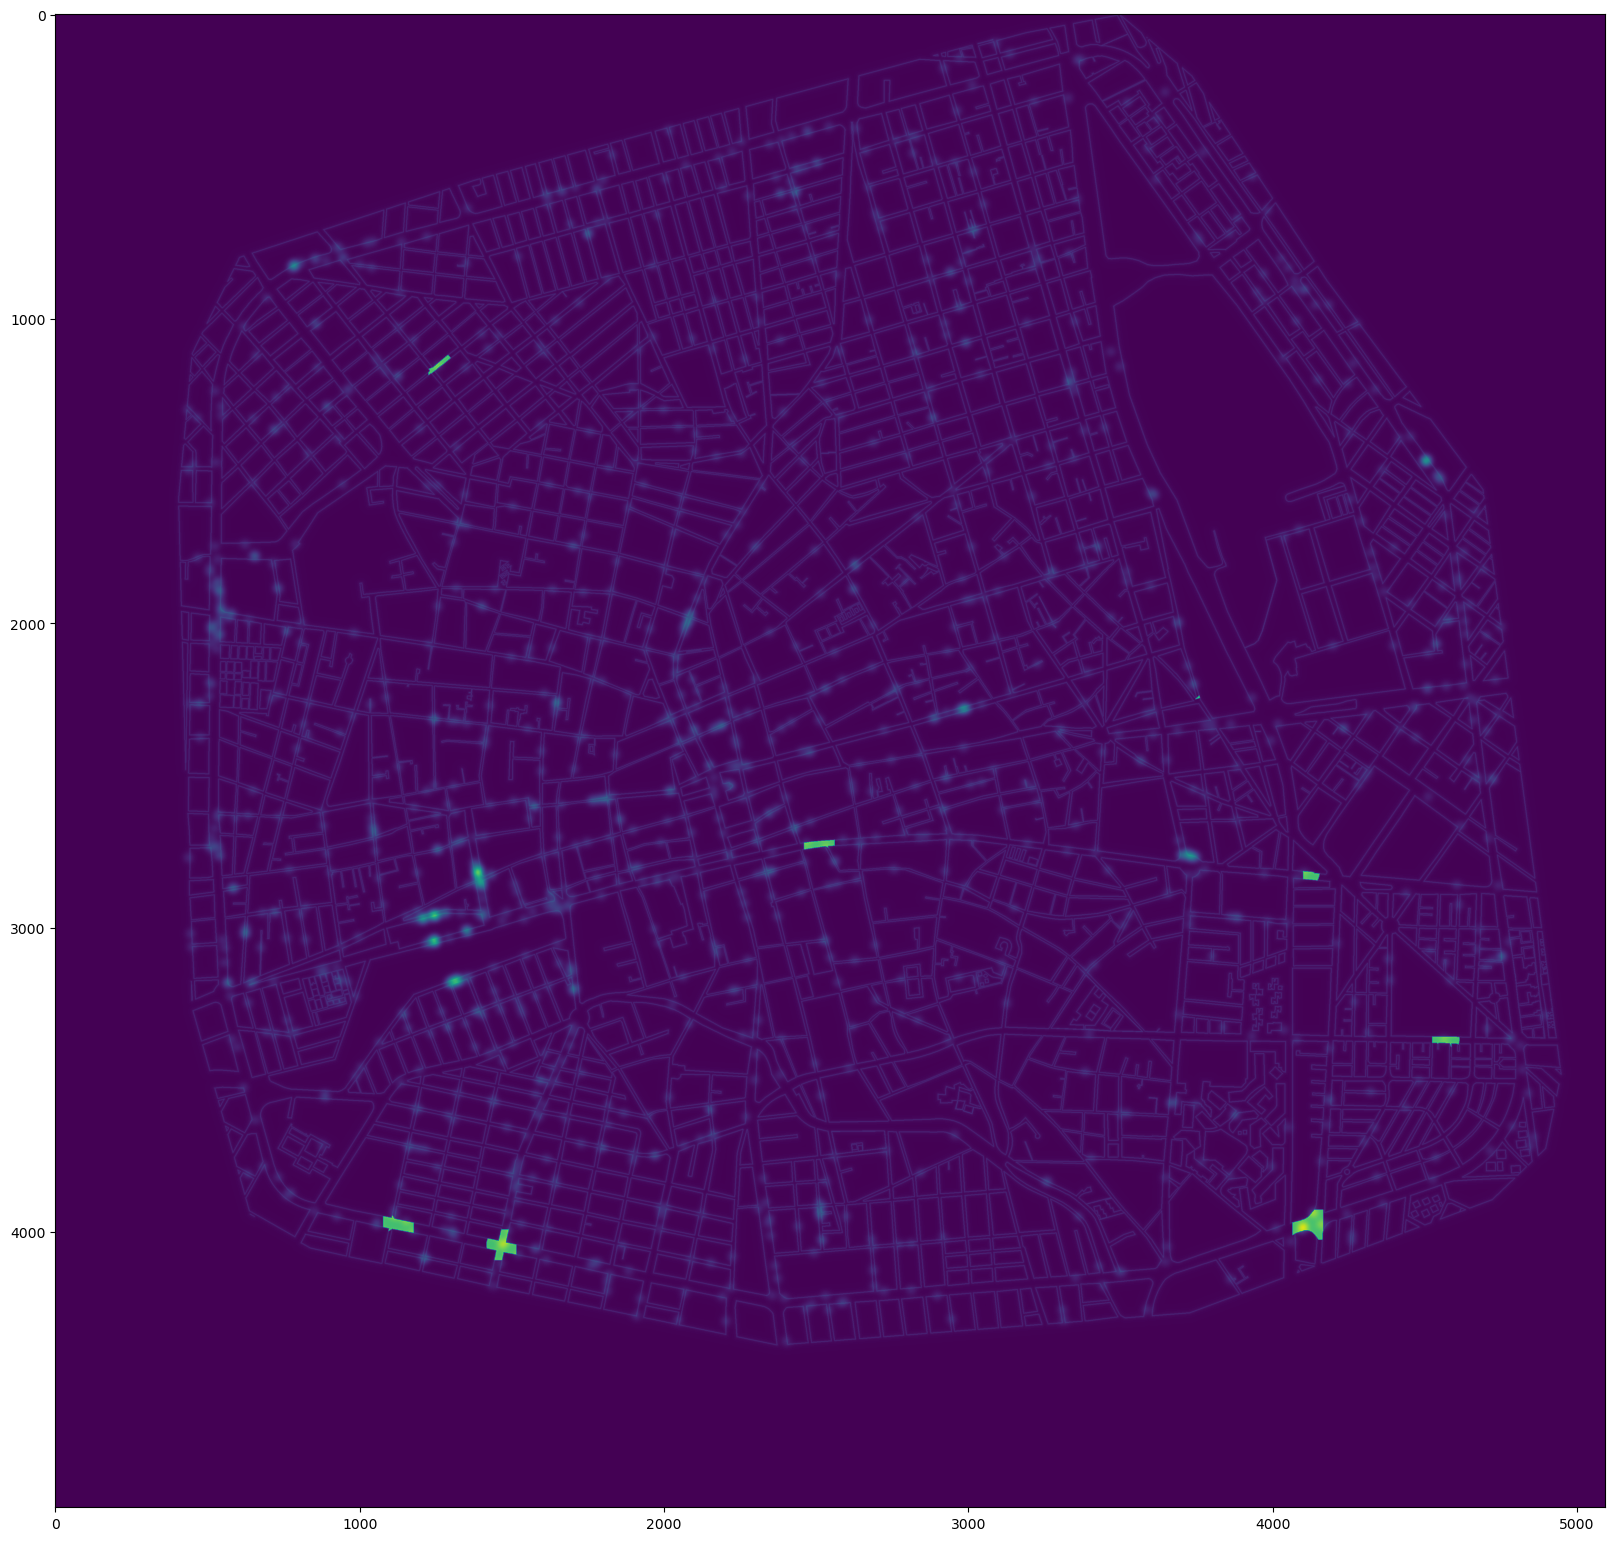

In [160]:
plt.figure(figsize=(20, 20))
plt.imshow(5*(max_covers>0)+W+CD*500)

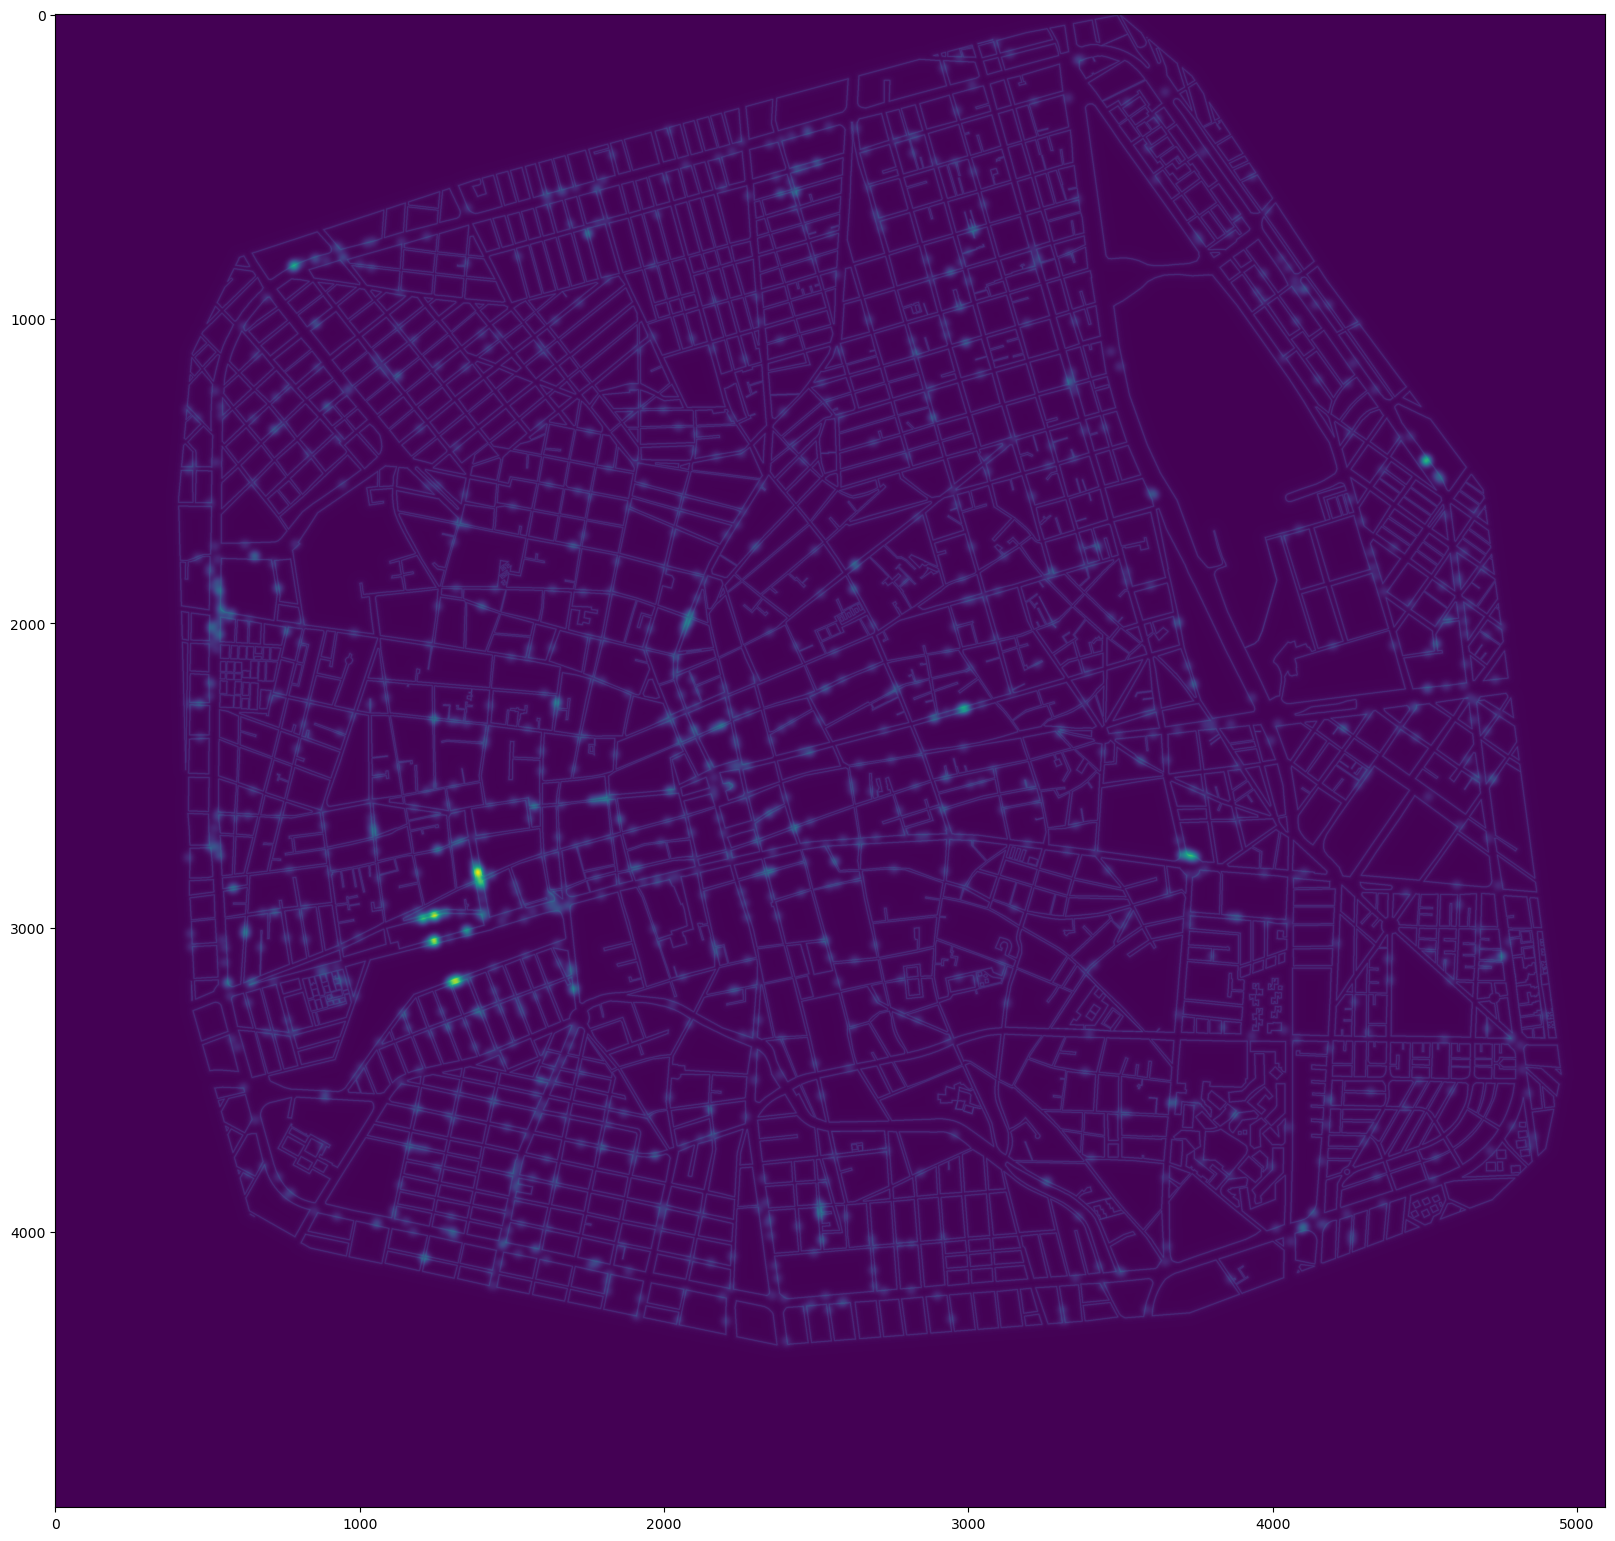

In [161]:
plt.figure(figsize=(20, 20))
plt.imshow(W+CD*500)

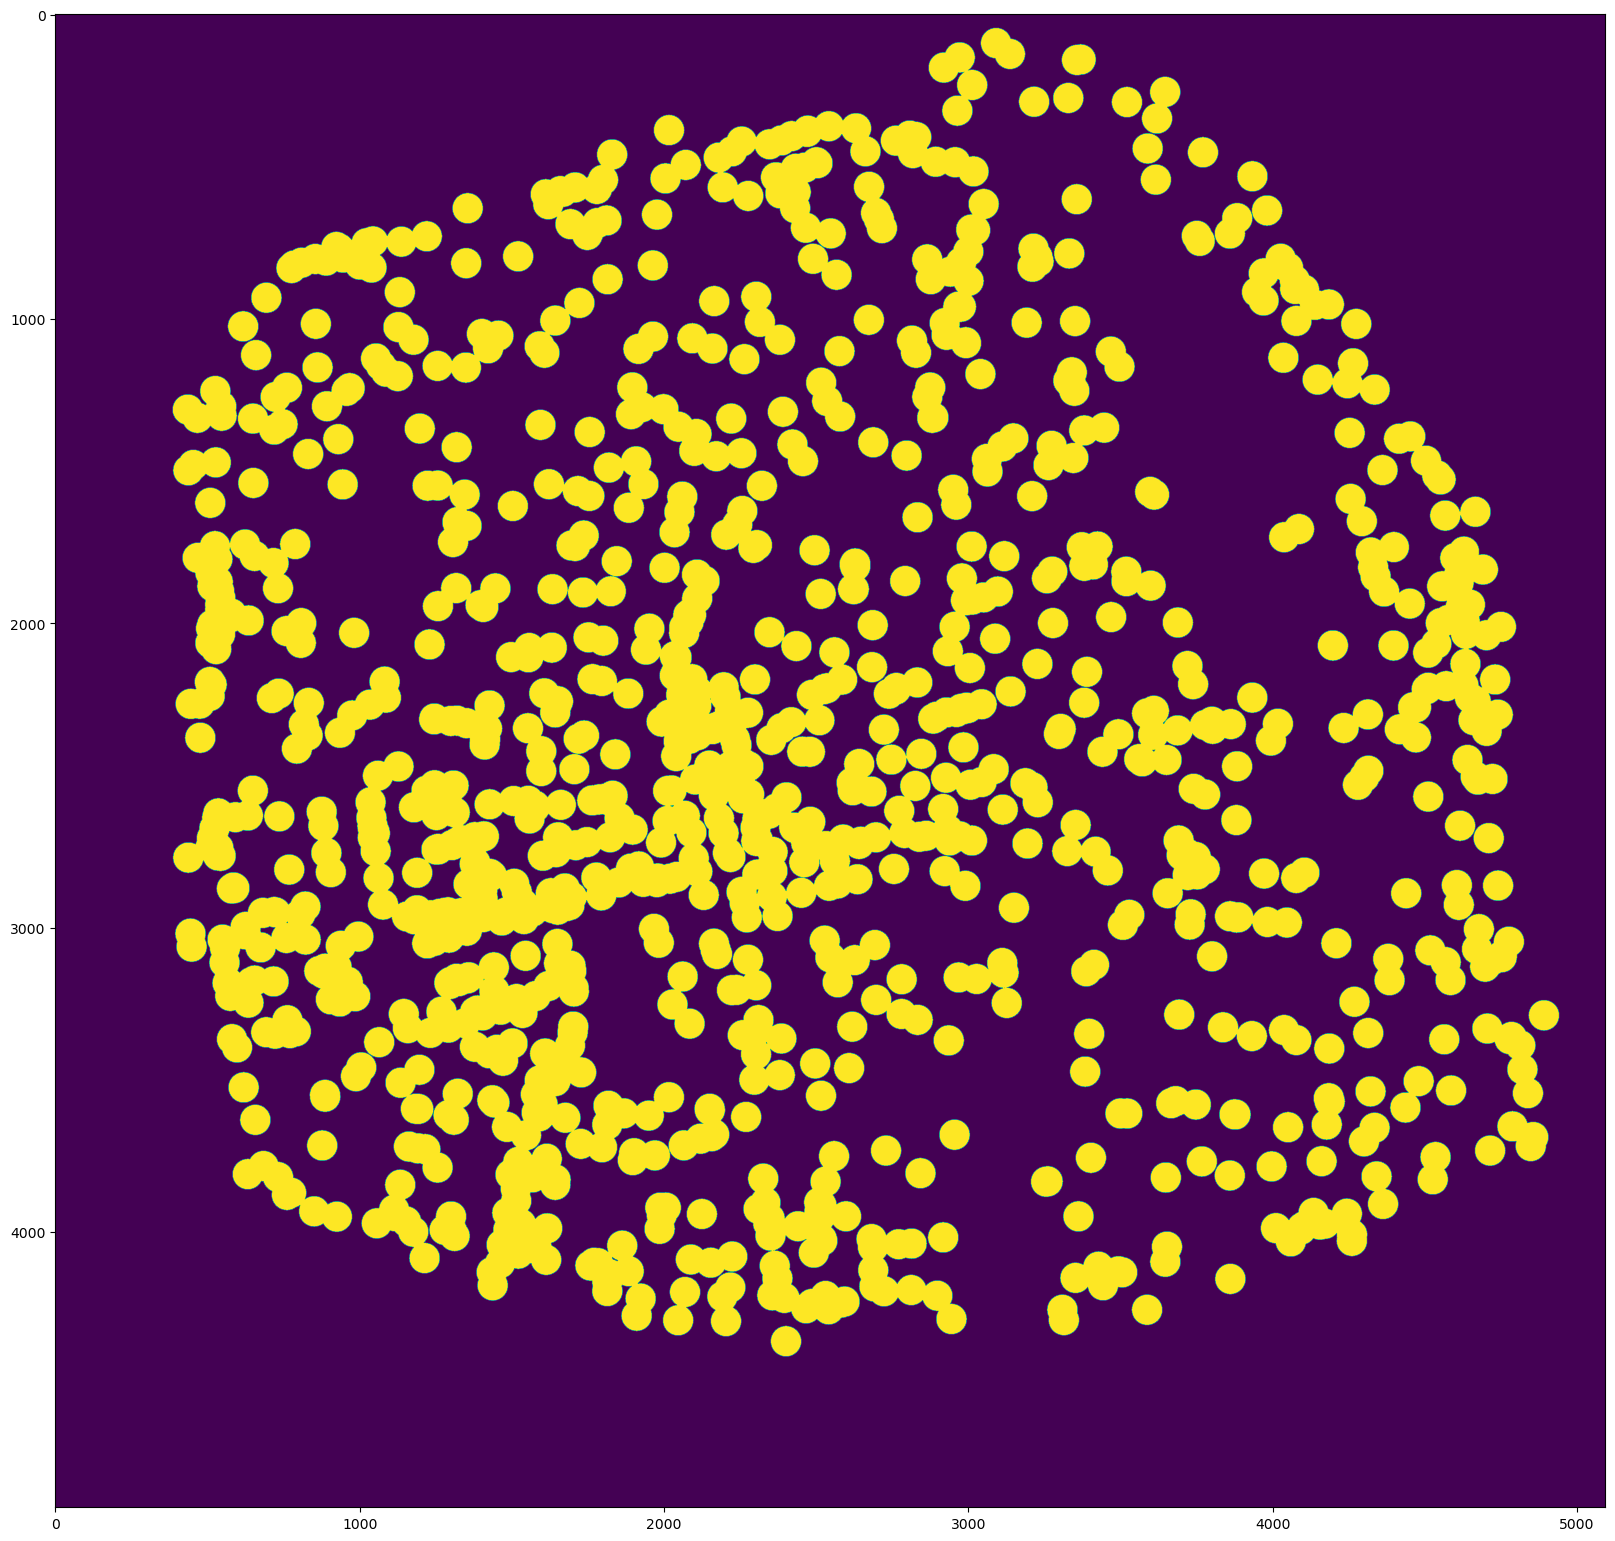

In [162]:
plt.figure(figsize=(20, 20))
plt.imshow((CD>0)*1)
#plt.imshow()

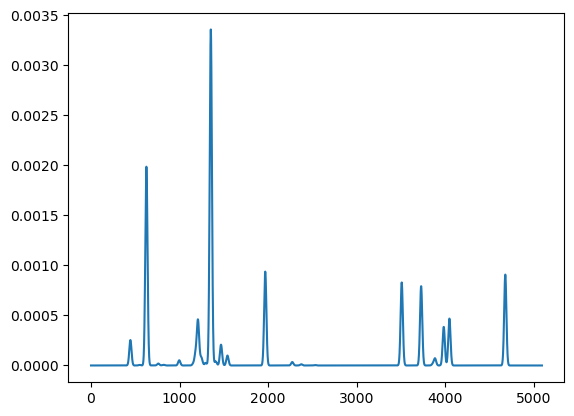

In [200]:

plt.plot(CD[3000,:])

In [202]:
nsig = 2
kernlen = L*2
x = np.linspace(-nsig, nsig, kernlen+1)
kern1d = np.diff(st.norm.cdf(x))

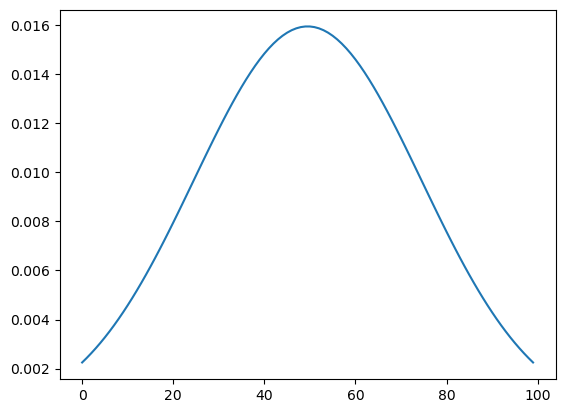

In [203]:
plt.plot(kern1d)

In [198]:
Sm = list([])

for i in np.arange(0, len(CD[3000,:])-L):
    Sm.append(np.sum(kern1d*CD[3000, i:i+L]))

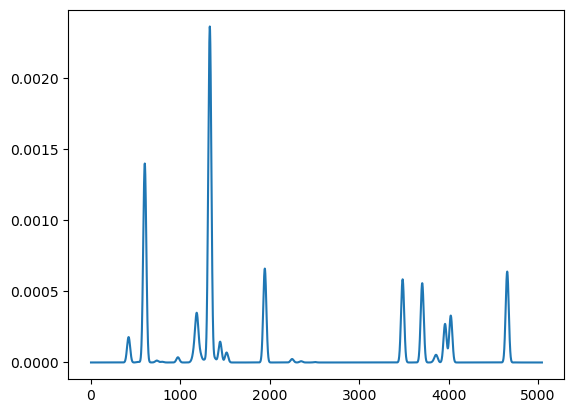

In [199]:
plt.plot(Sm)

In [1]:
plt.plot(CD[3000,:])
plt.plot(Sm)

NameError: name 'plt' is not defined